In [2]:
from pathlib import Path
import pandas as pd
import geopandas as gpd

import pyarrow.compute as pc

from src.datalake import Datalake

import matplotlib.pyplot as plt

In [4]:
data = Datalake()

In [ ]:
states = data.get_us_states()

In [5]:
query = pc.field('year') == 2022

In [6]:
weather = data.query_ghcnd(query)

In [7]:
# Filter the data for California
california = states[states['NAME'] == 'California']
california_geom = california.geometry.iloc[0]

In [8]:
data_california = weather[weather.geometry.within(california_geom)]

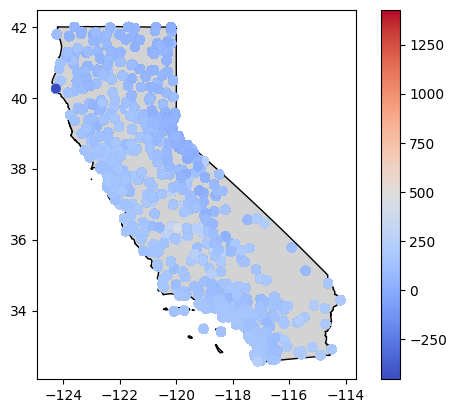

In [9]:

# Plot California
ax = california.plot(color='lightgrey', edgecolor='black')

# Plot the tmax values on the map of California
data_california.plot(ax=ax, column='tmax', cmap='coolwarm', legend=True)

# Show the plot
plt.show()

In [10]:
data_california

,station_id,year,month,day,prcp,snow,snwd,tmax,tmin,awnd,elevation,geometry
929444,US1CAAL0001,2022,1,1,0.0,0.0,NaN,NaN,NaN,NaN,113.4,POINT (-122.216 37.8123)
929445,US1CAAL0001,2022,1,2,0.0,0.0,NaN,NaN,NaN,NaN,113.4,POINT (-122.216 37.8123)
929446,US1CAAL0001,2022,1,3,0.0,0.0,NaN,NaN,NaN,NaN,113.4,POINT (-122.216 37.8123)
929447,US1CAAL0001,2022,1,4,218.0,NaN,NaN,NaN,NaN,NaN,113.4,POINT (-122.216 37.8123)
929448,US1CAAL0001,2022,1,5,15.0,NaN,NaN,NaN,NaN,NaN,113.4,POINT (-122.216 37.8123)
...,...,...,...,...,...,...,...,...,...,...,...,...
8836664,USW00094299,2022,12,27,53.0,NaN,NaN,67.0,0.0,67.0,1335.9,POINT (-120.5614 41.4836)
8836665,USW00094299,2022,12,28,0.0,NaN,NaN,33.0,-43.0,18.0,1335.9,POINT (-120.5614 41.4836)
8836666,USW00094299,2022,12,29,81.0,NaN,NaN,22.0,-32.0,23.0,1335.9,POINT (-120.5614 41.4836)
8836667,USW00094299,2022,12,30,127.0,NaN,NaN,72.0,6.0,25.0,1335.9,POINT (-120.5614 41.4836)


In [11]:
data_california.dtypes

station_id      object
year             int32
month            int32
day              int32
prcp           float64
snow           float64
snwd           float64
tmax           float64
tmin           float64
awnd           float64
elevation      float64
geometry      geometry
dtype: object

In [14]:
data = gpd.read_parquet(Path('../lake/clean/ghcnd/daily/2000.parquet'))

In [18]:
data.isnull().sum() / len(data) * 100

station_id      0.000000
year            0.000000
month           0.000000
day             0.000000
prcp            8.653042
snow           36.033336
snwd           38.234657
tmax           20.597330
tmin           20.632304
awnd           94.497646
awdr           99.980199
psun          100.000000
tavg           83.630463
tsun           99.232100
wt03           98.686426
wt08           99.669516
wv03           99.966032
elevation       0.000000
geometry        0.000000
dtype: float64